In [416]:
# We load the libraries we will use in this question.

import numpy as np                     # Matrix and vector algebra
import matplotlib.pyplot as plt        # Plots
import pandas as pd                    # Pandas, to manage databases 
import pandas_datareader.data as web   # Data reader from the web which uses pandas
import datetime as dt                  # Datetime to manage dates and Time
import seaborn as sns                  # Nice plots
plt.style.use('seaborn')

np.set_printoptions(precision=2)

The Problem set aim is to calculate the possible fall in GDP from the COVID-19 outbreak. We do several exercises. First we build a monthly matwix of GDP for the 6 cases. Then we calculate the quarterly drop and the total annual drop. Then we compare two different ways of recovery: a complete recovery right after the shock disappears and a gradual recovery at a given rate. Finally, we compare the shapes of the recovery with respect to the Great Recession started in 2008.

In [417]:
# Now we produce our cases. We build column vectors with the cases mentioned in the PS.

In [418]:
α       = np.array([0.4,0.5]) # This is the size of the drop
gdp     = np.ones((12,6))   # This is GDP, which we will assume equal to one in the baseline
gdpbase = np.ones((12,6))
gdpc     = np.ones((12,6))   # This is GDP, which we will assume equal to one in the baseline


In [419]:
# Next we replace the drops

gdp[3,0]   = 1-α[0]
gdp[3:5,1] = 1-α[0]
gdp[3:6,2] = 1-α[0]
gdp[3,3]   = 1-α[1]
gdp[3:5,4] = 1-α[1]
gdp[3:6,5] = 1-α[1]

print(gdp)


[[1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [0.6 0.6 0.6 0.5 0.5 0.5]
 [1.  0.6 0.6 1.  0.5 0.5]
 [1.  1.  0.6 1.  1.  0.5]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1. ]]


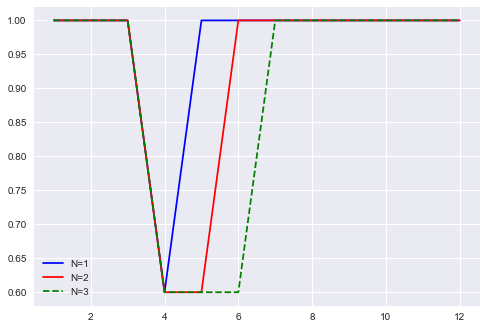

In [420]:
# Plotting the

time = np.linspace(1,12,12)
plt.plot(time,gdp[:,0],color='blue')
plt.plot(time,gdp[:,1],color='red')
plt.plot(time,gdp[:,2],color='green', linestyle='dashed')
plt.legend(['N=1','N=2','N=3'])

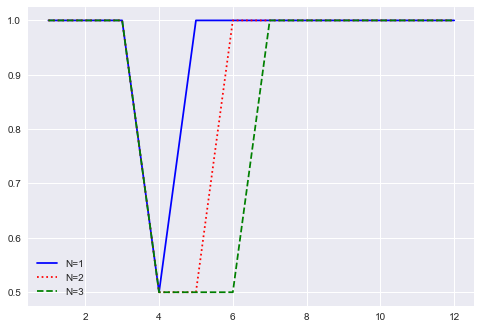

In [421]:
plt.plot(time,gdp[:,3],color='blue')
plt.plot(time,gdp[:,4],color='red', linestyle=':')
plt.plot(time,gdp[:,5],color='green', linestyle='dashed')
plt.legend(['N=1','N=2','N=3'])

In [422]:
# computating the maximum drop:

drop=np.amin(gdp,0) # we calculate the minim

print('Maximum fall in GDP in each case')
print("Case α=0.6 N=1 max drop: "+str(1-drop[0]))
print("Case α=0.6 N=2 max drop: "+str(1-drop[1]))
print("Case α=0.6 N=3 max drop: "+str(1-drop[2]))
print("Case α=0.5 N=1 max drop: "+str(1-drop[3]))
print("Case α=0.5 N=2 max drop: "+str(1-drop[4]))
print("Case α=0.5 N=3 max drop: "+str(1-drop[5]))



Maximum fall in GDP in each case
Case α=0.6 N=1 max drop: 0.4
Case α=0.6 N=2 max drop: 0.4
Case α=0.6 N=3 max drop: 0.4
Case α=0.5 N=1 max drop: 0.5
Case α=0.5 N=2 max drop: 0.5
Case α=0.5 N=3 max drop: 0.5


In [450]:
qtrgdp = np.zeros((4,6))

for i in range(5):
    for j in range(6):
        qtrgdp[i-1,j]=np.sum(gdp[(i-1)*3:i*3,j])
    
dropqtr=np.amin(qtrgdp,0)
#print(qtrgdp) 

print('Maximum fall in QUARTER GDP in each case')
print("Case α=0.6 N=1 max drop: "+str(np.around(100*(dropqtr[0]-3)/3,decimals=2))+" %" )
print("Case α=0.6 N=2 max drop: "+str(np.around(100*(dropqtr[1]-3)/3,decimals=2))+" %")
print("Case α=0.6 N=3 max drop: "+str(np.around(100*(dropqtr[2]-3)/3,decimals=2))+" %")
print("Case α=0.5 N=1 max drop: "+str(np.around(100*(dropqtr[3]-3)/3,decimals=2))+" %")
print("Case α=0.5 N=2 max drop: "+str(np.around(100*(dropqtr[4]-3)/3,decimals=2))+" %")
print("Case α=0.5 N=3 max drop: "+str(np.around(100*(dropqtr[5]-3)/3,decimals=2))+" %")

    

Maximum fall in QUARTER GDP in each case
Case α=0.6 N=1 max drop: -13.33 %
Case α=0.6 N=2 max drop: -26.67 %
Case α=0.6 N=3 max drop: -40.0 %
Case α=0.5 N=1 max drop: -16.67 %
Case α=0.5 N=2 max drop: -33.33 %
Case α=0.5 N=3 max drop: -50.0 %


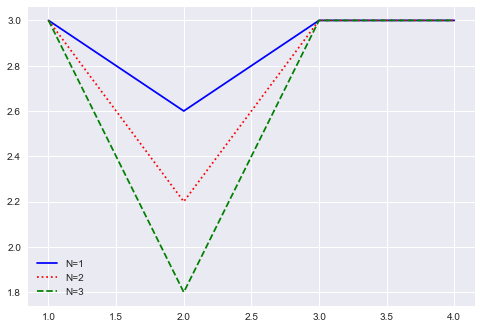

In [424]:
time2 = np.linspace(1,4,4)

plt.plot(time2,qtrgdp[:,0],color='blue')
plt.plot(time2,qtrgdp[:,1],color='red', linestyle=':')
plt.plot(time2,qtrgdp[:,2],color='green', linestyle='dashed')
plt.legend(['N=1','N=2','N=3'])

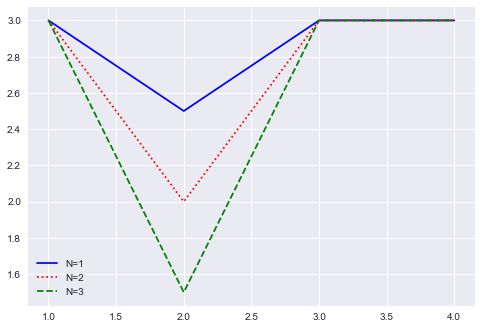

In [425]:
plt.plot(time2,qtrgdp[:,3],color='blue')
plt.plot(time2,qtrgdp[:,4],color='red', linestyle=':')
plt.plot(time2,qtrgdp[:,5],color='green', linestyle='dashed')
plt.legend(['N=1','N=2','N=3'])

In [426]:
gdpc = np.copy(gdp)

recorate = 0.5

for i in range(8):
    gdpc[i+4,0] = gdpc[i+3,0]+recorate*(gdpc[0,0]-gdpc[i+3,0])
    gdpc[i+4,3] = gdpc[i+3,3]+recorate*(gdpc[0,3]-gdpc[i+3,3])

for i in range(7):
    gdpc[i+5,1] = gdpc[i+4,1]+recorate*(gdpc[0,1]-gdpc[i+4,1])
    gdpc[i+5,4] = gdpc[i+4,4]+recorate*(gdpc[0,4]-gdpc[i+4,4])

for i in range(6):
    gdpc[i+6,2] = gdpc[i+5,2]+recorate*(gdpc[0,2]-gdpc[i+5,2])
    gdpc[i+6,5] = gdpc[i+5,5]+recorate*(gdpc[0,5]-gdpc[i+5,5])

    

In [437]:
qtrgdp_c = np.zeros((4,6))

for i in range(5):
    for j in range(6):
        qtrgdp_c[i-1,j]=np.sum(gdp_c[(i-1)*3:i*3,j])
    
dropqtr_c=np.amin(qtrgdp_c,0)
#print(qtrgdp) 

print('Maximum fall in QUARTER GDP in each case')
print("Case α=0.6 N=1 max drop: "+str(np.around(100*(dropqtr_c[0]-3)/3,decimals=2))+" %" )
print("Case α=0.6 N=2 max drop: "+str(np.around(100*(dropqtr_c[1]-3)/3,decimals=2))+" %")
print("Case α=0.6 N=3 max drop: "+str(np.around(100*(dropqtr_c[2]-3)/3,decimals=2))+" %")
print("Case α=0.5 N=1 max drop: "+str(np.around(100*(dropqtr_c[3]-3)/3,decimals=2))+" %")
print("Case α=0.5 N=2 max drop: "+str(np.around(100*(dropqtr_c[4]-3)/3,decimals=2))+" %")
print("Case α=0.5 N=3 max drop: "+str(np.around(100*(dropqtr_c[5]-3)/3,decimals=2))+" %")


Maximum fall in QUARTER GDP in each case
Case α=0.6 N=1 max drop: -29.2 %
Case α=0.6 N=2 max drop: -36.0 %
Case α=0.6 N=3 max drop: -40.0 %
Case α=0.5 N=1 max drop: -36.5 %
Case α=0.5 N=2 max drop: -45.0 %
Case α=0.5 N=3 max drop: -50.0 %


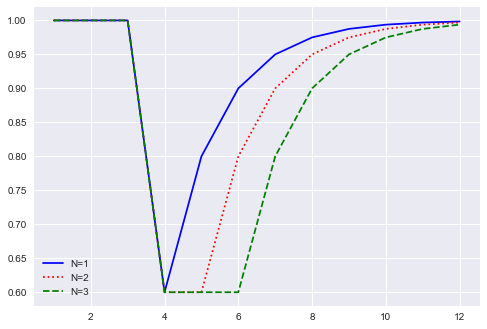

In [428]:
plt.plot(time,gdpc[:,0],color='blue')
plt.plot(time,gdpc[:,1],color='red', linestyle=':')
plt.plot(time,gdpc[:,2],color='green', linestyle='dashed')
plt.legend(['N=1','N=2','N=3'])


#plt.plot(time,gdp_2[:,0],color='blue')
#plt.plot(time,gdp_2[:,1],color='red')


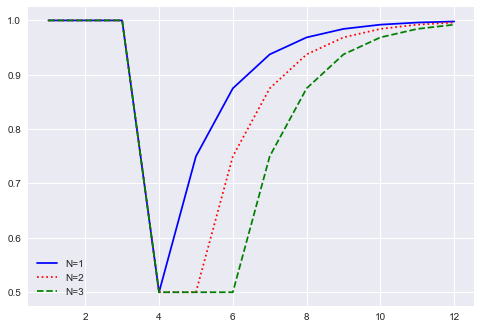

In [429]:
plt.plot(time,gdpc[:,3],color='blue')
plt.plot(time,gdpc[:,4],color='red', linestyle=':')
plt.plot(time,gdpc[:,5],color='green', linestyle='dashed')
plt.legend(['N=1','N=2','N=3'])


In [449]:
# The commulative drop

cumm1 = np.sum(gdpbase-gdp, axis=0)
cumm2 = np.sum(gdpbase-gdpc, axis=0)


print('Cummulative drop in ANNUAL GDP in each case') 
print("                         Persistent    Not Persistent    ")
print("Case α=0.6 N=1 cum drop: "+str(np.around(100*(cumm2[0])/12,decimals=2))+" %        "+str(np.around(100*(cumm1[0])/12,decimals=2))+" %" )
print("Case α=0.6 N=2 cum drop: "+str(np.around(100*(cumm2[1])/12,decimals=2))+" %        "+str(np.around(100*(cumm1[1])/12,decimals=2))+" %" )
print("Case α=0.6 N=3 cum drop: "+str(np.around(100*(cumm2[2])/12,decimals=2))+" %       "+str(np.around(100*(cumm1[2])/12,decimals=2))+" %" )
print("Case α=0.5 N=1 cum drop: "+str(np.around(100*(cumm2[3])/12,decimals=2))+" %        "+str(np.around(100*(cumm1[3])/12,decimals=2))+" %" )
print("Case α=0.5 N=2 cum drop: "+str(np.around(100*(cumm2[4])/12,decimals=2))+" %       "+str(np.around(100*(cumm1[4])/12,decimals=2))+" %" )
print("Case α=0.5 N=3 cum drop: "+str(np.around(100*(cumm2[5])/12,decimals=2))+" %        "+str(np.around(100*(cumm1[5])/12,decimals=2))+" %" )


Cummulative drop in ANNUAL GDP in each case
                         Persistent    Not Persistent    
Case α=0.6 N=1 cum drop: 6.65 %        3.33 %
Case α=0.6 N=2 cum drop: 9.97 %        6.67 %
Case α=0.6 N=3 cum drop: 13.28 %       10.0 %
Case α=0.5 N=1 cum drop: 8.32 %        4.17 %
Case α=0.5 N=2 cum drop: 12.47 %       8.33 %
Case α=0.5 N=3 cum drop: 16.6 %        12.5 %


In [408]:
# SET START AND END DATES OF THE SERIES
 
sdtus = dt.datetime(2007, 1, 1)
edtus = dt.datetime(2014, 12, 1) 

ip = web.DataReader("INDPRO", "fred", sdtus, edtus)
ip1 = web.DataReader("GDPC1", "fred", sdtus, edtus)

ip.head()

sdtsp = dt.datetime(2007, 1, 1)
edtsp = dt.datetime(2020, 12, 1) 

ipsp = web.DataReader("ESPPROINDQISMEI", "fred", sdtsp, edtsp)

ipsp1 = web.DataReader("CLVMNACSCAB1GQES", "fred", sdtsp, edtsp)

ipsp.head()


,ESPPROINDQISMEI
DATE,
2007-01-01,135.058113
2007-04-01,135.274779
2007-07-01,133.797445
2007-10-01,133.485778
2008-01-01,133.108111


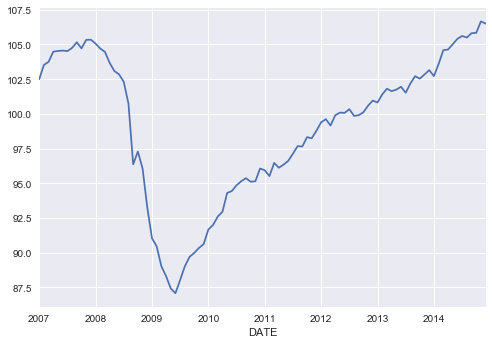

In [409]:
ip.INDPRO.plot()

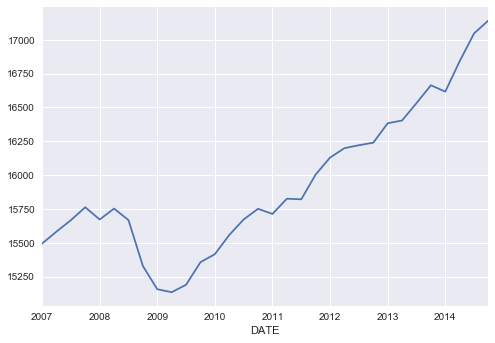

In [410]:
ip1.GDPC1.plot()

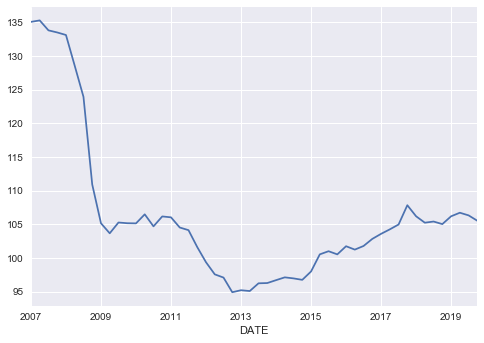

In [407]:
ipsp.ESPPROINDQISMEI.plot()


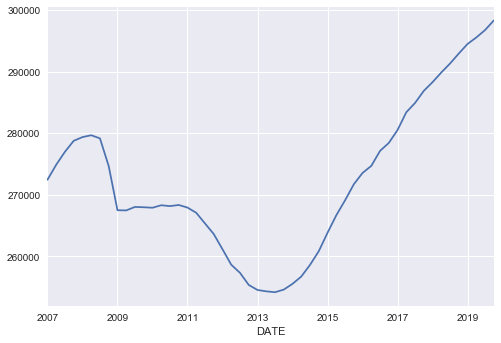

In [406]:
ipsp1.CLVMNACSCAB1GQES.plot()